<a href="https://colab.research.google.com/github/koseogluonur/-Python-for-Data-Science-and-Machine-Learning-/blob/main/Non_Linear_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doğrusal Olmayan Regreson Modelleri

In [5]:
from google.colab import files
files.upload()

Saving Hitters.csv to Hitters.csv


{'Hitters.csv': b'AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague\r\n293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A\r\n315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N\r\n479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A\r\n496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N\r\n321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N\r\n594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750,A\r\n185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70,A\r\n298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100,A\r\n323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75,N\r\n401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100,A\r\n574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A\r\n202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.5,N\r\n418,113,13,48,61,47,4,1512,392,41,205,204,203,N,E,211

In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [7]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn_model.n_neighbors

5

In [ ]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [ ]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.64671325413764
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV  

In [ ]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

8

In [ ]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.39475147063825
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.64671325413764 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [ ]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR (Destek Vektör Regresyonu)

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR("linear").fit(X_train, y_train)

In [ ]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [ ]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [ ]:
-48.69756097561513 + 4.969512195122093*91

In [ ]:
y_pred = svr_model.predict(X_train)

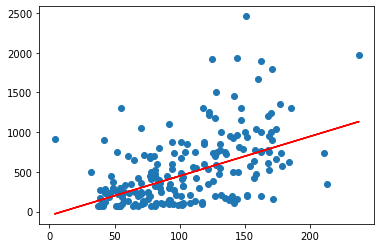

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [ ]:
#Doğrusal regresyonla karşılaştırma
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [ ]:
-8.814095480334572 + 5.1724561354706875*91

Text(0, 0.5, 'Maaş (Salary)')

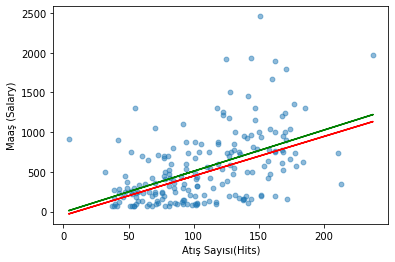

In [ ]:
#İki yöntemi grafik üzerinde karşılaştırma 
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [ ]:
svr_model.predict([[91]])

array([403.52804878])

In [ ]:
y_pred = svr_model.predict(X_test)
y_pred

array([ 627.15609756,  681.82073171,  627.15609756,  428.37560976,
        155.05243902,  294.19878049,  781.21097561,  691.7597561 ,
        741.45487805,  299.16829268,  706.66829268,  612.24756098,
        169.96097561,  671.88170732,  428.37560976,  512.85731707,
        935.26585366,  314.07682927,  979.99146341,  517.82682927,
        319.04634146, 1059.50365854,  527.76585366,  567.52195122,
        945.20487805,  239.53414634,  716.60731707,  363.77195122,
        289.22926829,  179.9       ,  249.47317073,  -43.72804878,
        328.98536585,  547.64390244,  289.22926829,  403.52804878,
        686.7902439 ,  547.64390244,   85.47926829,  214.68658537,
        155.05243902,  512.85731707,  547.64390244,  497.94878049,
        632.12560976,  686.7902439 ,  209.71707317,  492.97926829,
        537.70487805,  751.39390244,  652.00365854,  229.59512195,
        860.72317073,  632.12560976,  324.01585366,  736.48536585,
        497.94878049,  299.16829268,  110.32682927,  632.12560

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [ ]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Model Tuning

In [ ]:
svr_model

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [ ]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [ ]:
#Bütün değişkenler üzerinde yapıldığı zaman
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
svr_cv_model.best_params_

{'C': 0.4}

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [ ]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [ ]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

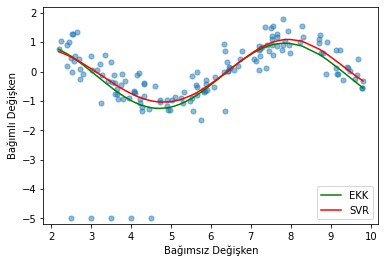

In [ ]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = svr_rbf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [ ]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [ ]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [ ]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# Yapay Sinir Ağları(Çok katmanlı algılayıcı)

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [ ]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
mlp_model.n_layers_

4

In [ ]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

419.88299414561783

## Model Tuning

In [ ]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [ ]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activat

In [ ]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [ ]:
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.7496922657652

# CART

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor(min_samples_split = 2,max_depth=2)

In [ ]:
?cart_model

In [ ]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

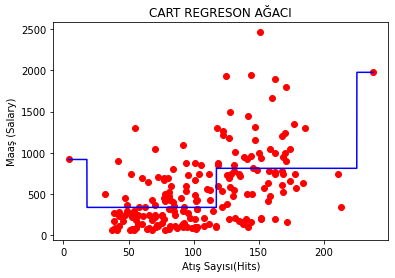

In [ ]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [ ]:
#Kural setini dışarıya çıkarmak
!pip install skompiler

     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for skompiler: filename=SKompiler-0.5.5-cp37-none-any.whl size=57149 sha256=36728664f5832df4db7b33988b9c398a09e9a48bf6fe1a743e075f089f9d4589
  Stored in directory: /root/.cache/pip/wheels/21/eb/99/6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built skompiler


In [ ]:
from skompiler import skompile

In [ ]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else 340.2029043478261) if x[0] <= 117.5 else 
    813.0988 if x[0] <= 225.5 else 1975.0)



## Tahmin

In [ ]:
x = [91]

In [ ]:
((920.0 if x[0] <= 18.0 else 340.2029043478261) if x[0] <= 117.5 else 
    813.0988 if x[0] <= 225.5 else 1975.0)

340.2029043478261

In [ ]:
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 340.20290435,
       340.20290435])

In [ ]:
cart_model.predict([[91]])

array([340.20290435])

In [ ]:
y_pred =cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

430.81036420947464

## Model Tuning

In [ ]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [ ]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
              

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [ ]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs

In [ ]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [ ]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [ ]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=76,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = cart_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

# Bagged Trees Regresyon

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
bag_model.n_estimators

10

In [ ]:
bag_model.estimators_

In [ ]:
bag_model.estimators_samples_

In [ ]:
bag_model.estimators_features_

In [ ]:
bag_model.estimators_[1]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1428182856, splitter='best')

## Tahmin

In [ ]:
y_pred = bag_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

352.538184458975

In [ ]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

476.28135936495596

In [ ]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

# Model Tuning

In [ ]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
bag_params = {"n_estimators": range(2,20)}

In [ ]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [ ]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(2, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
bag_cv_model.best_params_

{'n_estimators': 6}

In [ ]:
bag_tuned = BaggingRegressor( n_estimators = 6, random_state = 45)

In [ ]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=6, n_jobs=None,
                 oob_score=False, random_state=45, verbose=0, warm_start=False)

In [ ]:
y_pred = bag_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.9759709118334

# Random Forests

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Tahmin

In [ ]:
rf_model.predict(X_test)[0:5]

array([ 746.94667,  898.16164, 1182.32833,  139.30167,  626.75833])

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.73852779396566

## Model Tuning

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [ ]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.4354506235962

In [ ]:
#Her bir değişkenin modeldeki etkisini görmek için
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

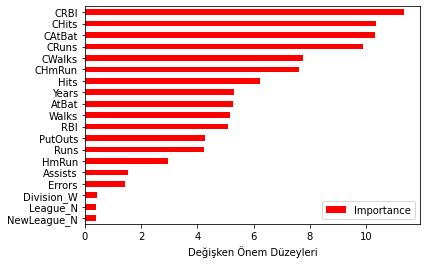

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Tahmin

In [9]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8067902966062

## Model Tuning

In [10]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [11]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 28.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [53]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.75}

In [67]:
#Bazen algoritma ve veri yapısını tanıyım hangi değerin en iyi geliceğini kendin de düşünebilirsin.
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 3, 
                                      n_estimators = 1000, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [68]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

339.1576165629048

In [21]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

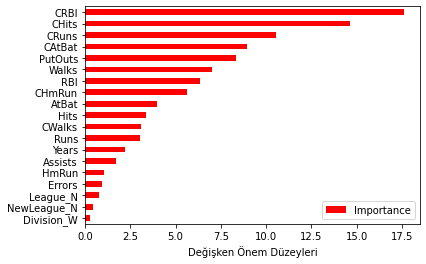

In [22]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [23]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [24]:
#
!pip install xgboost

In [25]:
import xgboost as xgb

In [26]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [27]:
from xgboost import XGBRegressor

In [28]:
xgb_model = XGBRegressor().fit(X_train, y_train)

[10:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Tahmin

In [29]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

359.91750599447033

## Model Tuning

In [69]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [70]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [71]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1982 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2670 tasks      | elapsed:  3.8min


[10:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  4.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
   

In [72]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [73]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

[10:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.0512895885908

# Light GBM

In [75]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [76]:
#
!pip install lightgbm

In [77]:
from lightgbm import LGBMRegressor

In [ ]:
Ligth GBM yüklenirken hata veriyorsa
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [78]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [79]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [81]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [83]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [84]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 2736 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5000 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7920 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  5.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 

In [85]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [86]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20,
                          colsample_bytree = 0.4)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [87]:
y_pred = lgbm_tuned.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))

378.960437342183

# CatBoost

In [89]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [90]:
!pip install catboost

     |████████████████████████████████| 67.3MB 58kB/s 


In [91]:
from catboost import CatBoostRegressor

In [92]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 48.8ms	remaining: 48.7s
1:	learn: 432.4168868	total: 50.7ms	remaining: 25.3s
2:	learn: 426.3836690	total: 52.7ms	remaining: 17.5s
3:	learn: 420.2261014	total: 54.8ms	remaining: 13.6s
4:	learn: 414.9976675	total: 56.8ms	remaining: 11.3s
5:	learn: 409.6125323	total: 58.6ms	remaining: 9.71s
6:	learn: 403.9277911	total: 60.4ms	remaining: 8.56s
7:	learn: 398.4395285	total: 62.4ms	remaining: 7.74s
8:	learn: 392.4517081	total: 64.5ms	remaining: 7.1s
9:	learn: 387.4871123	total: 66.5ms	remaining: 6.58s
10:	learn: 382.6230510	total: 68.5ms	remaining: 6.16s
11:	learn: 378.1012454	total: 70.7ms	remaining: 5.82s
12:	learn: 372.6002306	total: 73.1ms	remaining: 5.55s
13:	learn: 368.4682192	total: 75.2ms	remaining: 5.3s
14:	learn: 364.0565766	total: 77.3ms	remaining: 5.08s
15:	learn: 359.5683249	total: 79.5ms	remaining: 4.89s
16:	learn: 355.1782794	total: 81.8ms	remaining: 4.73s
17:	learn: 350.4689946	total: 84.1ms	remaining: 4.59s
18:	learn:

## Tahmin

In [93]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Model Tuning

In [94]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [95]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))